In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from shutil import copyfile

In [21]:
EMOTIONS = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]

# 1. Auxiliary functions

In [3]:
EMOTIONS_PATH = "/Users/samuilstoychev/ckplus/CK+/Emotion"
IMAGES_PATH = "/Users/samuilstoychev/ckplus/CK+/cohn-kanade-images" 

In [9]:
def listdir(path):
    """List all items in a given directory (in ascending order)."""
    res = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            res.append(f)
    return sorted(res)

In [5]:
def get_images(subject, sample): 
    folder = "/".join([IMAGES_PATH, subject, sample])
    images = listdir(folder)
    neutral = folder + "/" + images[0]
    emotional = [folder + "/" + img for img in [images[-3], images[-2], images[-1]]]
    return (neutral, emotional)

# 2. Allocating images to emotions

In [6]:
subjects = listdir(EMOTIONS_PATH) 

In [7]:
train_subjects = set(random.sample(subjects, int(0.7 * len(subjects))))

In [8]:
len(train_subjects)

86

In [9]:
len(subjects) - len(train_subjects)

37

In [10]:
data = [[] for _ in range(8)] 

for subj in subjects: 
    samples = listdir(EMOTIONS_PATH + "/" + subj) 
    for samp in samples: 
        files = listdir(EMOTIONS_PATH + "/" + subj + "/" + samp)
        if len(files) is not 0: 
            fsubj, fsample, _, _ = files[0].split("_")
            emotion = open(EMOTIONS_PATH + "/" + subj + "/" + samp + "/" + files[0], "r").read().strip()
            emotion = int(float(emotion)) 
            neutral, emotional = get_images(fsubj, fsample)
            data[0].append(neutral)
            data[emotion] += emotional

### Distribution of emotions

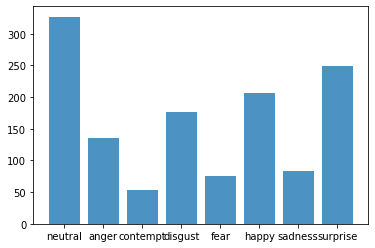

Distribution of emotions: [327, 135, 54, 177, 75, 207, 84, 249]
Images in total: 1308


In [11]:
dist = [len(data[x]) for x in range(8)]
y_pos = np.arange(len(EMOTIONS))

plt.bar(y_pos, dist, align='center', alpha=0.8)
plt.xticks(y_pos, EMOTIONS)

plt.show()
print("Distribution of emotions:", dist)
print("Images in total:", sum(dist))

# 3. Splitting into train and test

In [12]:
sum([len(x) for x in data])

1308

In [13]:
train = [list(filter(lambda x: x.split("/")[-3] in train_subjects, em)) for em in data]
test = [list(filter(lambda x: x.split("/")[-3] not in train_subjects, em)) for em in data]

In [14]:
sum([len(x) for x in train])

924

In [15]:
sum([len(x) for x in test])

384

# Compare Train and Test Distribution

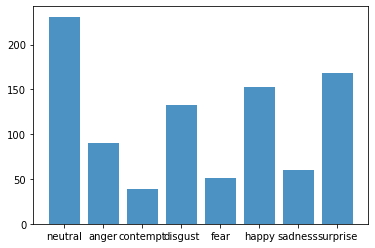

Distribution of emotions: [231, 90, 39, 132, 51, 153, 60, 168]
Images in total: 924


In [16]:
dist = [len(x) for x in train]
y_pos = np.arange(len(EMOTIONS))

plt.bar(y_pos, dist, align='center', alpha=0.8)
plt.xticks(y_pos, EMOTIONS)

plt.show()
print("Distribution of emotions:", dist)
print("Images in total:", sum(dist))

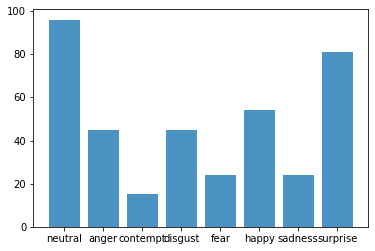

Distribution of emotions: [96, 45, 15, 45, 24, 54, 24, 81]
Images in total: 384


In [17]:
dist = [len(x) for x in test]
y_pos = np.arange(len(EMOTIONS))

plt.bar(y_pos, dist, align='center', alpha=0.8)
plt.xticks(y_pos, EMOTIONS)

plt.show()
print("Distribution of emotions:", dist)
print("Images in total:", sum(dist))

# Get the Subject-to-Gender Mapping

In [18]:
labels_file = './ckplus_labels.csv'
df = pd.read_csv(labels_file, header=None)

In [19]:
gender_of = dict() 
for subj, lab in df.values: 
    gender_of[subj] = lab

In [20]:
print("Number of female subjecs:", sum(df[1]=='f'))
print("Number of male subjecs:", sum(df[1]=='m'))

Number of female subjecs: 84
Number of male subjecs: 39


# 4. Copy into new directory

In [21]:
def add_gender(name): 
    return name.split(".")[0] + "_" + gender_of[name.split("_")[-3]] + "." + name.split(".")[1]

In [22]:
NEW_FOLDER_TRAIN = "/Users/samuilstoychev/ckplus_cross_subject/train/"
NEW_FOLDER_TEST = "/Users/samuilstoychev/ckplus_cross_subject/test/"
for emotion_index in range(8): 
    train_folder = NEW_FOLDER_TRAIN + "class_" + str(emotion_index) + "/" 
    test_folder = NEW_FOLDER_TEST + "class_" + str(emotion_index) + "/" 
    
    for img_address in train[emotion_index]: 
        filename = img_address.split("/")[-1]
        copyfile(img_address, train_folder + add_gender(filename))
    for img_address in test[emotion_index]: 
        filename = img_address.split("/")[-1]
        copyfile(img_address, test_folder + add_gender(filename))

# 5. Other Visualisations

Distribution of emotions: [231, 90, 39, 132, 51, 153, 60, 168]
Images in total: 924


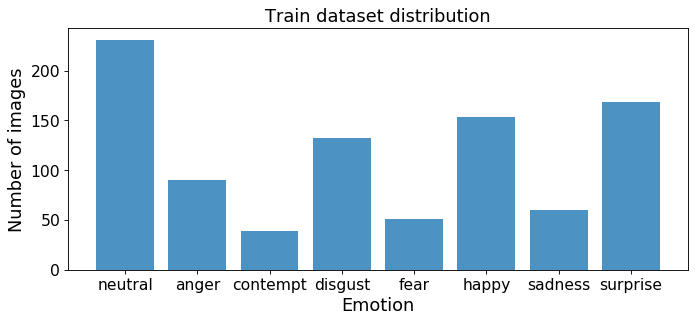

In [40]:
dist = [len(listdir("/Users/samuilstoychev/ckplus_cross_subject/train/class_" + str(i))) for i in range(8)]

y_pos = np.arange(len(EMOTIONS))
plt.figure(figsize=(10,4), dpi=80)

plt.bar(y_pos, dist, align='center', alpha=0.8)
plt.xticks(y_pos, EMOTIONS)
plt.tick_params(labelsize=14)
plt.xlabel("Emotion", size=16)
plt.ylabel("Number of images", size=16)

plt.title("Train dataset distribution", size=16)
plt.savefig("figures/train_dist.svg")
print("Distribution of emotions:", dist)
print("Images in total:", sum(dist))

Distribution of emotions: [96, 45, 15, 45, 24, 54, 24, 81]
Images in total: 384


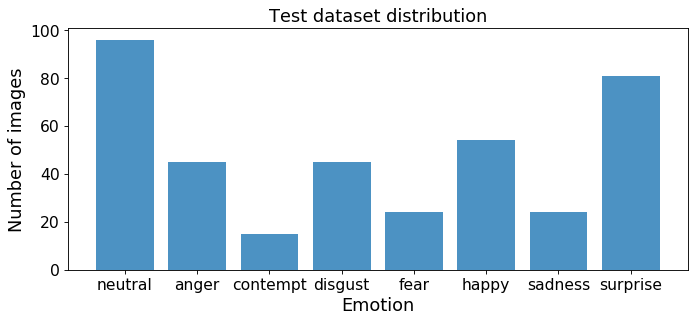

In [41]:
dist = [len(listdir("/Users/samuilstoychev/ckplus_cross_subject/test/class_" + str(i))) for i in range(8)]

y_pos = np.arange(len(EMOTIONS))
plt.figure(figsize=(10,4), dpi=80)

plt.bar(y_pos, dist, align='center', alpha=0.8)
plt.xticks(y_pos, EMOTIONS)
plt.tick_params(labelsize=14)
plt.xlabel("Emotion", size=16)
plt.ylabel("Number of images", size=16)

plt.title("Test dataset distribution", size=16)
plt.savefig("figures/test_dist.svg")
print("Distribution of emotions:", dist)
print("Images in total:", sum(dist))